In [1]:
# ! pip install fiftyone

## Visualize images in RDD2022 for the ORDDC'2024 competition

In [2]:
import os
import fiftyone as fo
import fiftyone.zoo as foz

In [3]:
# Path of the dataset formatted in ~/images/**/*.jpg and ~/labels/**/*.txt
dataset_dir="rdd2022/coco"

In [4]:
! tree -L 2 $dataset_dir

rdd2022/coco
├── annotations
│   ├── histogram_coco4_rdd2022.json
│   ├── rdd2022_annotations.json
│   ├── train.json
│   └── val.json
├── test
│   ├── India
│   ├── Japan
│   ├── Norway
│   ├── overall_6_countries
│   └── United_States
├── train
│   ├── images
│   └── images.txt
└── val
    ├── images
    └── images.txt

11 directories, 6 files


#### Load the dataset, using tags to mark the samples in each split

In [5]:
import time
# Name of the dataset in session
name = "export_coco_rdd2022" + str(time.time())
# The splits to load 
splits = ["train"] # "train", "val", 

In [6]:
# The type of the dataset being imported
dataset_type = fo.types.COCODetectionDataset  # for example

# Import the dataset
dataset = fo.Dataset.from_dir(
    name = name,
    dataset_type=dataset_type,
    data_path=os.path.join(dataset_dir, splits[0], "images"),
    labels_path=os.path.join(dataset_dir, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |█████████████| 21109/21109 [34.4s elapsed, 0s remaining, 600.6 samples/s]      


In [7]:
print(dataset.summary())

Name:        export_coco_rdd20221726100152.0078073
Media type:  image
Num samples: 21109
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [8]:
print(dataset.stats())

{'samples_count': 21109, 'samples_bytes': 15169884, 'samples_size': '14.5MB', 'total_bytes': 15169884, 'total_size': '14.5MB'}


### Creates a session and opens the App in the output of the cell


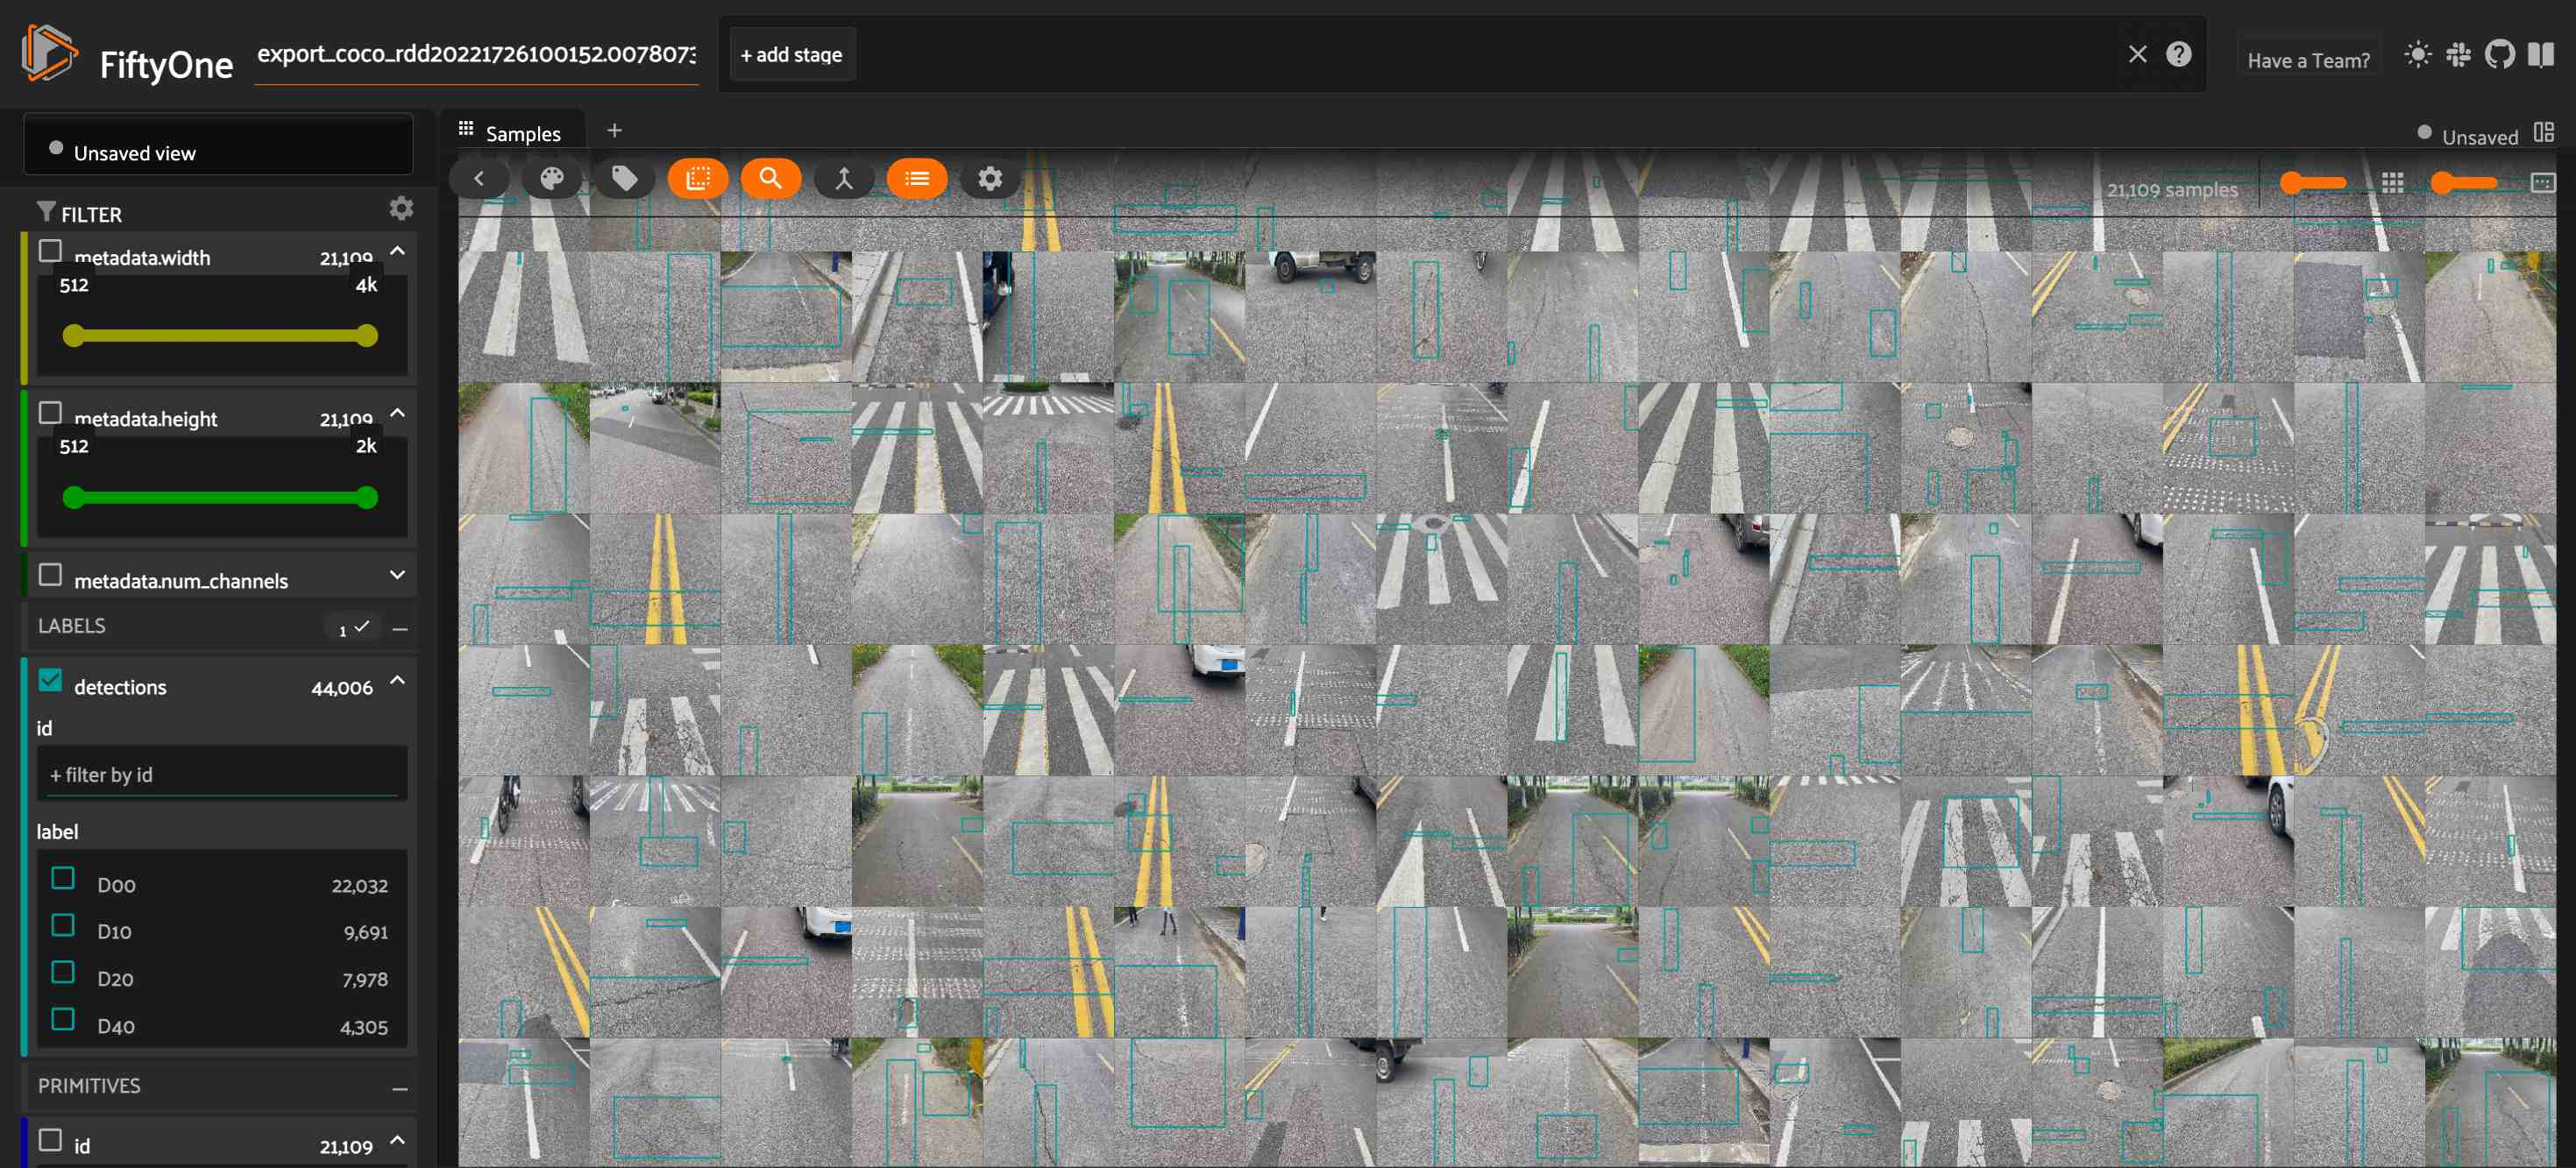

In [9]:
session = fo.launch_app(dataset)

In [10]:
# Replace active App instance with screenshot so App state is viewable offline
session.freeze()

## Visualize Histogram


In [5]:
import os, json
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def load_data(hist_file):
    with open(hist_file, 'r') as file:
        hist_data = json.load(file)
        print(hist_data.keys())
    return hist_data

In [7]:
loaded_data_hist = load_data(os.path.join(dataset_dir, "annotations", "histogram_coco4_rdd2022.json"))
print(loaded_data_hist)

dict_keys(['D00', 'D20', 'D10', 'D40'])
{'D00': {'China_Drone': 1426, 'China_MotorBike': 2678, 'Czech': 988, 'India': 1555, 'Japan': 4049, 'Norway': 8570, 'United_States': 6750}, 'D20': {'China_Drone': 293, 'China_MotorBike': 641, 'Czech': 161, 'India': 2021, 'Japan': 6199, 'Norway': 468, 'United_States': 834}, 'D10': {'China_Drone': 1263, 'China_MotorBike': 1096, 'Czech': 399, 'India': 68, 'Japan': 3979, 'Norway': 1730, 'United_States': 3295}, 'D40': {'China_Drone': 86, 'China_MotorBike': 235, 'Czech': 197, 'India': 3187, 'Japan': 2243, 'Norway': 461, 'United_States': 135}}


In [26]:
def plot_hist(hist_data, dataset_name):
    defect_types = sorted(hist_data.keys())
    country_data = {"China_Drone": [], "China_MotorBike": [], "Czech": [], "India": [],
                    "Japan": [], "Norway": [], "United_States": []}
    for code in defect_types:
        val_count = hist_data[code]
        for country, count in val_count.items():
            country_data[country].append(count)
    print(country_data)

    bar_colors = {"China_Drone": "tab:pink", "China_MotorBike": "tab:purple", "Czech": "tab:blue", "India": "tab:orange",
                    "Japan": "tab:brown", "Norway": "tab:olive", "United_States": "tab:cyan"}

    x = np.arange(len(defect_types))  # the defect label locations
    width = 0.12  # the width of the bars
    multiplier = 0
    fig, ax = plt.subplots(figsize=(14, 6), layout='constrained') # 

    for attribute, measurement in country_data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=bar_colors[attribute])
        ax.bar_label(rects, padding=3, fontsize = 12)
        multiplier += 1

    ax.set_ylabel('Count', fontsize = 12)
    #ax.set_title('Histogram of annotated labels {} in {} dataset'.format(list(defect_types), dataset_name))
    ax.set_xticks(x + width*3, defect_types, fontsize = 12)
    ax.legend(loc='upper right', ncols=1, fontsize=14)
    ax.set_ylim(0, 9000)
    plt.show()
    fig.savefig('rdd2022_dataset_histogram.png', dpi=300)

{'China_Drone': [1426, 1263, 293, 86], 'China_MotorBike': [2678, 1096, 641, 235], 'Czech': [988, 399, 161, 197], 'India': [1555, 68, 2021, 3187], 'Japan': [4049, 3979, 6199, 2243], 'Norway': [8570, 1730, 468, 461], 'United_States': [6750, 3295, 834, 135]}


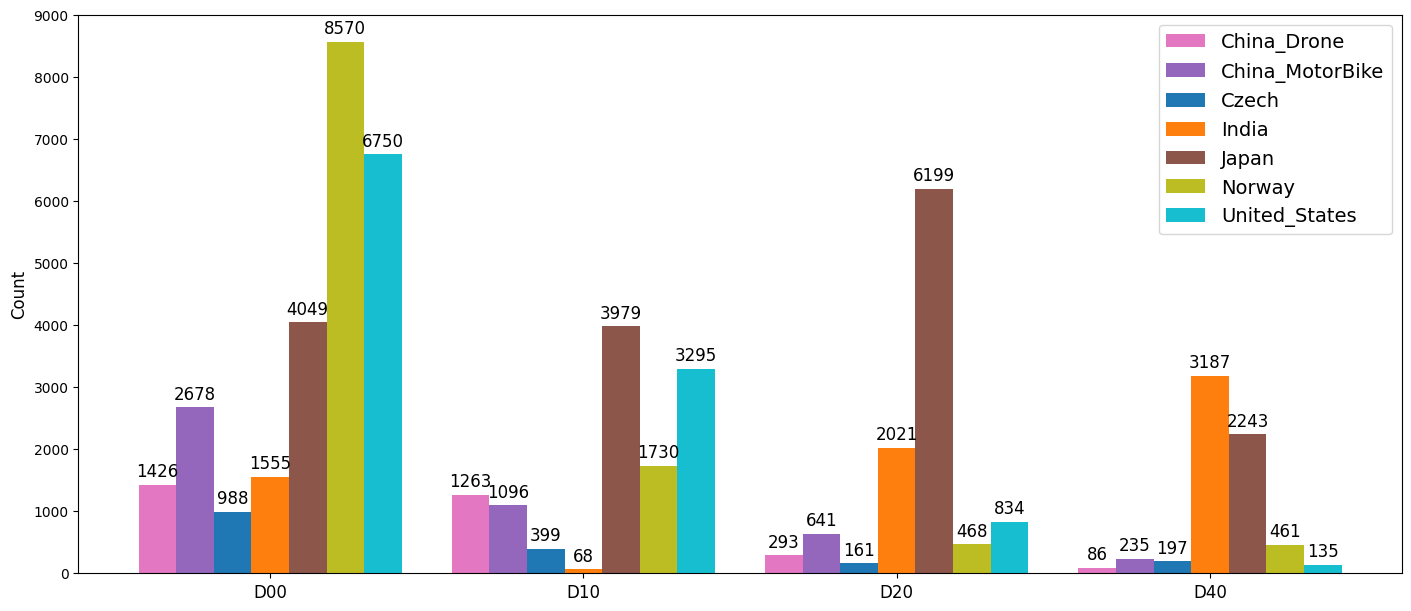

In [27]:
plot_hist(loaded_data_hist, dataset_name="RDD 2022")